In [1]:
#workflow and statistics
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt

#for showing missing values
import missingno as msno

#visualisation
import seaborn as sns

#natural language processing toolkit
import nltk
import string
from nltk.corpus import stopwords  # removes useless words
from nltk.stem.lancaster import LancasterStemmer  #converts the words to base form; aggressive
from nltk.stem import porter
from nltk.stem.util import suffix_replace, prefix_replace
from nltk.stem.api import StemmerI
from nltk.stem import SnowballStemmer

#create a wordcloud of often used words
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
nltk.download('stopwords')

#accessing google cloud storage
#from google.cloud import storage
#from io import BytesIO
#client = storage.Client()
#bucket = "bilderkennung_nf_2020"

#building baseline classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

# Grid search cross validation
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('./jigsaw-toxic-comment-train.csv')

In [3]:
train.shape

(223549, 8)

In [4]:
data_ = {'toxic':[11.4], 'non-toxic':[88.9]}

In [5]:
rel_dist = pd.DataFrame.from_dict(data_)
rel_dist.transpose()

,0
toxic,11.4
non-toxic,88.9


<Figure size 720x432 with 0 Axes>

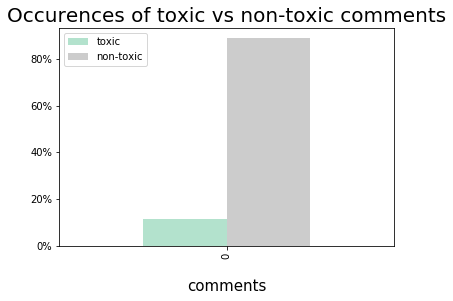

In [6]:
import matplotlib.ticker as mtick

plt.figure(1,figsize=(10,6))
ax = rel_dist.plot(kind='bar', colormap='Pastel2')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Occurences of toxic vs non-toxic comments",fontsize=20)
#plt.ylabel('number of Occurrences', fontsize=15,labelpad=20)
plt.xlabel('comments', fontsize=15,labelpad=20)
plt.show()

**Prepare Data**

In [7]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
train['comment_text'] = train['comment_text'].apply(remove_punctuation)

In [8]:
sw=stopwords.words('english')
def removesw(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
train['comment_text'] = train['comment_text'].apply(removesw)

In [9]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
train['comment_text'] = train['comment_text'].apply(stemming)

**Verctorize**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(train.comment_text)
vectorizer.vocabulary_

{'explan': 88396,
 'edit': 81549,
 'made': 152874,
 'usernam': 254756,
 'hardcor': 108116,
 'metallica': 159534,
 'fan': 89960,
 'revert': 205028,
 'werent': 263330,
 'vandal': 256984,
 'closur': 59454,
 'gas': 99293,
 'vote': 260309,
 'new': 170572,
 'york': 275297,
 'doll': 77451,
 'fac': 89129,
 'pleas': 189250,
 'dont': 77738,
 'remov': 203483,
 'templat': 238821,
 'talk': 233306,
 'page': 182321,
 'sinc': 219400,
 'im': 125883,
 'retir': 204811,
 'now892053827': 175196,
 'daww': 69837,
 'match': 156091,
 'background': 37614,
 'colour': 60798,
 'seem': 214187,
 'stuck': 228505,
 'thank': 240439,
 '2151': 9420,
 'januari': 134314,
 '11': 2217,
 '2016': 8578,
 'utc': 256092,
 'hey': 110914,
 'man': 154213,
 'realli': 201148,
 'tri': 246454,
 'war': 261476,
 'guy': 106097,
 'constant': 63031,
 'relev': 203167,
 'inform': 129541,
 'instead': 130323,
 'care': 52267,
 'format': 95277,
 'actual': 22613,
 'info': 129465,
 'cant': 51839,
 'make': 153683,
 'real': 201076,
 'suggest': 229888,

In [14]:
vectorizer.transform(train.comment_text).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Train Test Split**

In [15]:
from sklearn.model_selection import train_test_split


sentences = train['comment_text'].values
y = train['toxic'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<167661x240435 sparse matrix of type '<class 'numpy.int64'>'
	with 4462743 stored elements in Compressed Sparse Row format>

**Baseline Model Logistic Regression**

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.9491125107357572


/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Pipeline**

In [18]:
#packages for building a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report 

In [22]:
#import classification models
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
#GridSearch model improvement
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

In [32]:
cat_var = y
num_var = sentences

In [ ]:
# Pipline for numerical features
cont_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Complete pipeline
preprocessor = ColumnTransformer([
    ('num', cont_pipeline, num_var),
    ('cat', cat_pipeline, cat_var)
])

In [34]:
# Building a full pipeline with our preprocessor
models = [
    GaussianNB, LogisticRegression, XGBClassifier, AdaBoostClassifier, RandomForestClassifier,SVC
]
for model in models:
    print(str(model))
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model())])
    pipe.fit(X_train, y_train)
    y_train_predicted = cross_val_predict(pipe, X_train, y_train, cv=5)

    # confusion matrix and classification report
    results = confusion_matrix(y_train, y_train_predicted)
    print('Confusion Matrix :')
    print((results))
    print('Accuracy Score :', accuracy_score(y_train, y_train_predicted))
    print('Report : ')
    print(classification_report(y_train, y_train_predicted))

    # permutation importance
    result = permutation_importance(pipe_hard,
                                    X_test,
                                    y_test,
                                    n_repeats=10,
                                    random_state=42,
                                    n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False,
               labels=X_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
    

<class 'sklearn.naive_bayes.GaussianNB'>


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

**GridSearch**

In [ ]:
xgb_pipe = Pipeline([('preprocessor', preprocessor_hard1), ('classifier', XGBClassifier())])

In [ ]:
parameters_xgb = {
    'classifier__max_depth': [2,3],
    'classifier__n_estimators': [100,250,500,750,1000],
    'classifier__learning_rate': [0.1, 0.5, 1, 0.01],
}

In [ ]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=parameters_xgb,
    n_jobs = -1,
    cv = 10,
    verbose=5,
    scoring='recall'
)

In [ ]:
grid_search_xgb.fit(X_hard1_train, y_hard1_train)

In [ ]:
print("Best parameters:\n{}".format(grid_search_xgb.best_params_))

In [ ]:
best_model_rf = grid_search_xgb.best_estimator_['classifier']

In [ ]:
preprocessor_hard1.fit(X_hard1_train)
X_test_preprocessed = preprocessor_hard1.transform(X_hard1_test)

In [ ]:
y_test_predicted_xgb = best_model_rf.predict(X_test_preprocessed)

In [ ]:
results = confusion_matrix(y_hard1_test, y_test_predicted_xgb)
print('Confusion Matrix :')
print((results))
print('Accuracy Score :', accuracy_score(y_hard1_test, y_test_predicted_xgb))
print('Report : ')
print(classification_report(y_hard1_test, y_test_predicted_xgb))